# An example using Feature weighted ECM clustering


In [26]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns
from evclust.datasets import load_2c6d_dataset


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


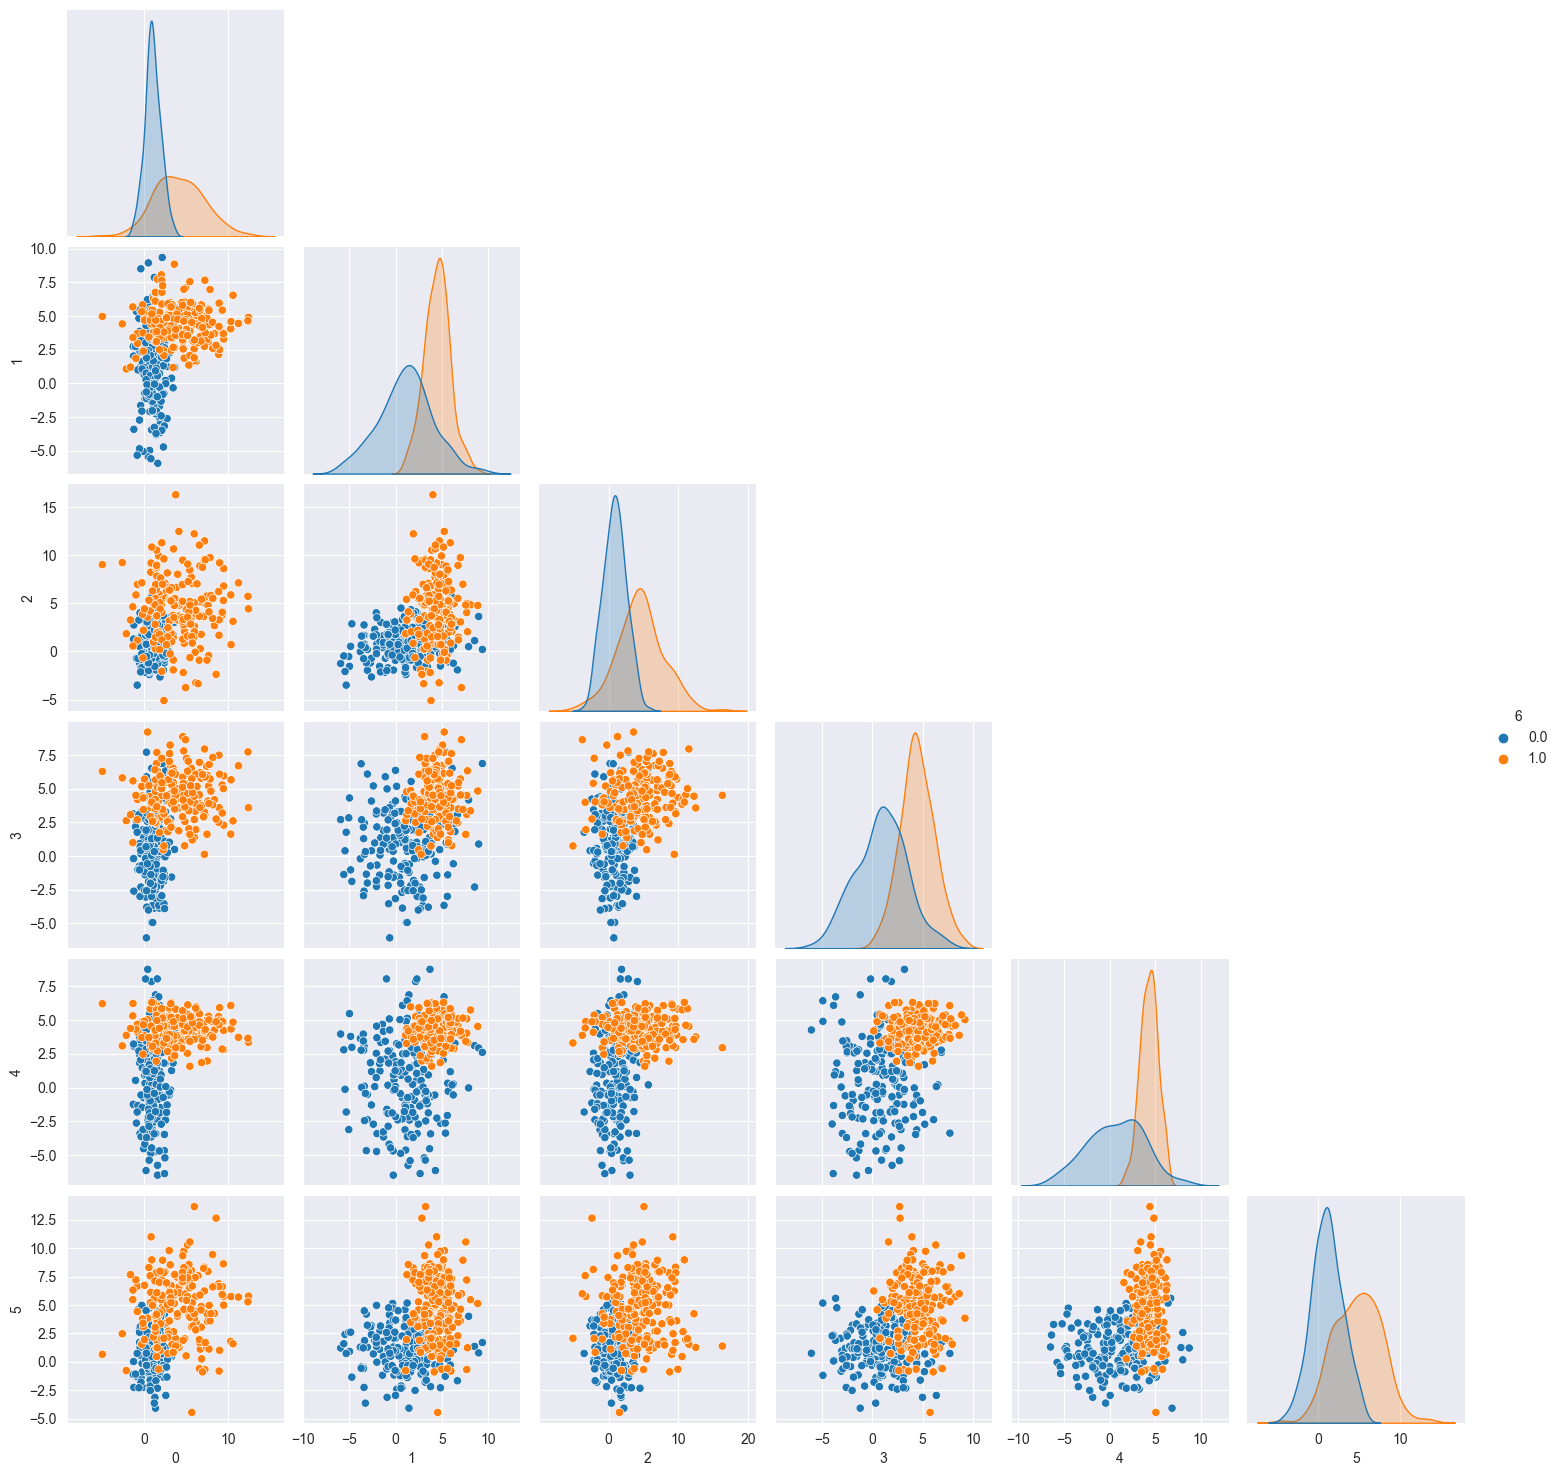

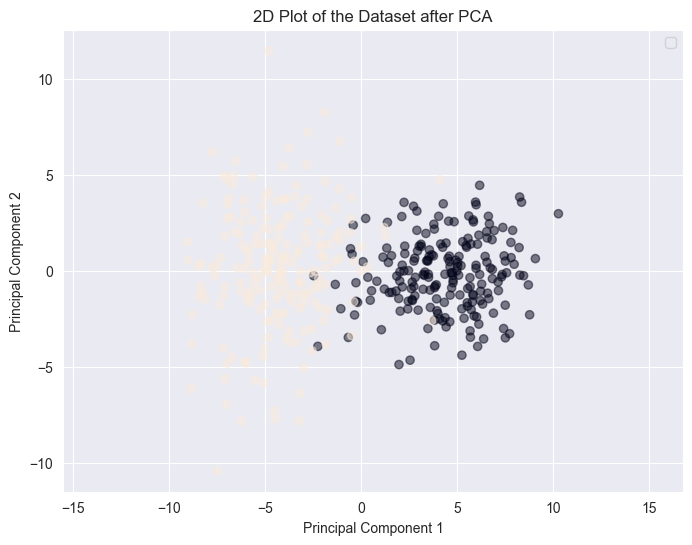

In [34]:
## Generating data set
# Number of points in each cluster
# num_points = 200
# 
# # Number of dimensions for each point
# num_dimensions = 6
# 
# # Mean and covariance matrices for each cluster
identity = np.eye(6)
cov_matrix1 = np.array([1, 8, 3, 7, 9, 4]).reshape((6, 1)) * identity
cov_matrix2 = np.array([9, 2, 10, 3, 1, 8]).reshape((6, 1)) * identity
# 
# cluster_params = [
#     {"mean": [1, 1, 1, 1, 1, 1], "covariance": cov_matrix1, "label": 0},
#     {"mean": [4.5, 4.5, 4.5, 4.5, 4.5, 4.5], "covariance": cov_matrix2, "label": 1},
# ]
# 
# # Generate data for each cluster
# # data = np.concatenate([np.random.multivariate_normal(params["mean"], params["covariance"], num_points) for params in cluster_params])
# dataset = np.concatenate(
#     [np.column_stack((np.random.multivariate_normal(params["mean"], params["covariance"], num_points),
#                       np.full((num_points, 1), params["label"]))) for params in cluster_params])
dataset = load_2c6d_dataset().values
last_column = dataset[:, -1]
cluster1 = dataset[last_column == 0]
cluster2 = dataset[last_column == 1]

df = pd.DataFrame(data=dataset[:, :-1])

# Scatter matrix plot
df_wt_label = pd.DataFrame(dataset)
sns.pairplot(df_wt_label, corner=True, hue=df_wt_label.columns[-1])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(dataset[:, :-1])

# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=dataset[:, -1])
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [28]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 7381.050114467496]
[2, 7372.50518554532]
[3, 7371.695245326016]
[4, 7371.584060745266]
[5, 7371.567000045885]
[6, 7371.564188977013]
[7, 7371.563707582087]
[   0.         7371.56370758 7371.56370758]
[1, 7381.050114467496]
[2, 7372.505185545321]
[3, 7371.695245326016]
[4, 7371.5840607452665]
[5, 7371.567000045885]
[6, 7371.564188977014]
[7, 7371.563707582087]
[1.00000000e+00 7.37156371e+03 7.37156371e+03]
[1, 7381.050114467496]
[2, 7372.505185545321]
[3, 7371.695245326016]
[4, 7371.5840607452665]
[5, 7371.567000045885]
[6, 7371.564188977014]
[7, 7371.563707582087]
[2.00000000e+00 7.37156371e+03 7.37156371e+03]
[1, 7381.050114467496]
[2, 7372.50518554532]
[3, 7371.695245326016]
[4, 7371.584060745266]
[5, 7371.567000045885]
[6, 7371.564188977013]
[7, 7371.563707582087]
[3.00000000e+00 7.37156371e+03 7.37156371e+03]
[1, 7381.050114467496]
[2, 7372.505185545321]
[3, 7371.695245326016]
[4, 7371.5840607452665]
[5, 7371.567000045885]
[6, 7371.564188977014]
[7, 7371.563707582087]
[4.000000

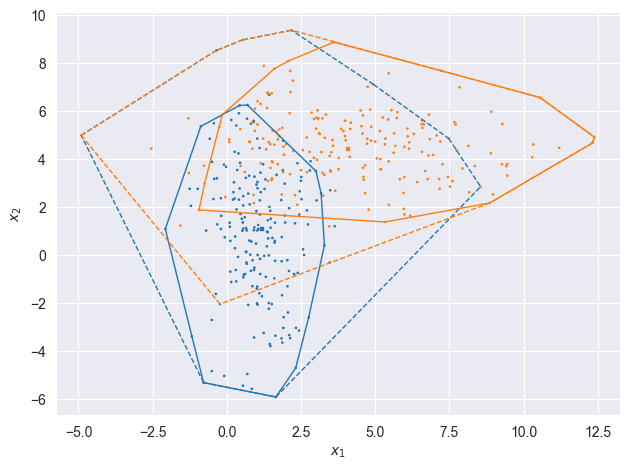

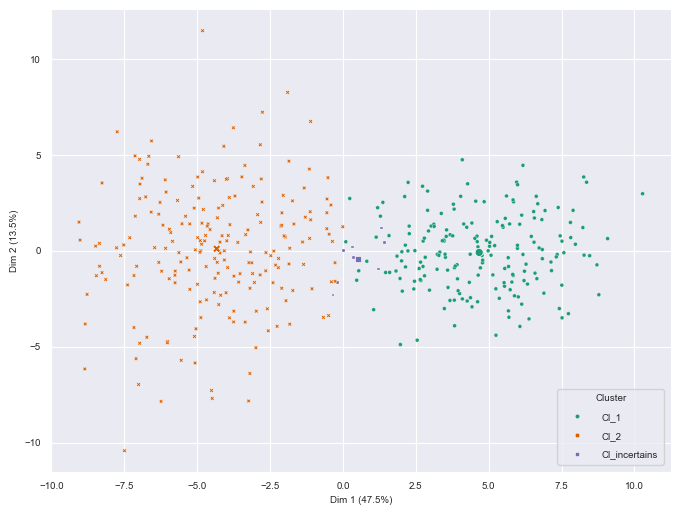

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.8368165198486512
Maximum Non-specificity value: 1.9929374415070227
Minimum Non-specificity value: 0.28540631748161294
Average Non-specificity value: 0.9876622071927198


In [29]:
# Traditional ECM clustering
model = ecm(x=df, c=2, beta=2, alpha=1, delta=100, ntrials=10)

ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

Initial weight matrix: 
 [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[1, 206.03358041074878]
[2, 150.7278099853387]
[3, 134.24239160697832]
[4, 134.09825784636055]
[5, 134.0912153002384]
[6, 134.0907864624681]
[7, 134.0907540284216]
[  0.         134.09075403 134.09075403]
Initial weight matrix: 
 [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[1, 206.03358041074878]
[2, 150.7278099853387]
[3, 134.24239160697832]
[4, 134.09825784636055]
[5, 134.0912153002384]
[6, 134.0907864624681]
[7, 134.0907540284216]
[  1.         134.09075403 134.09075403]
Initial weight matrix: 
 [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[1, 206.03358041074878]
[2, 150.7278099853387]
[3, 134.24239160697832]
[4, 134.09825784636055]
[5,

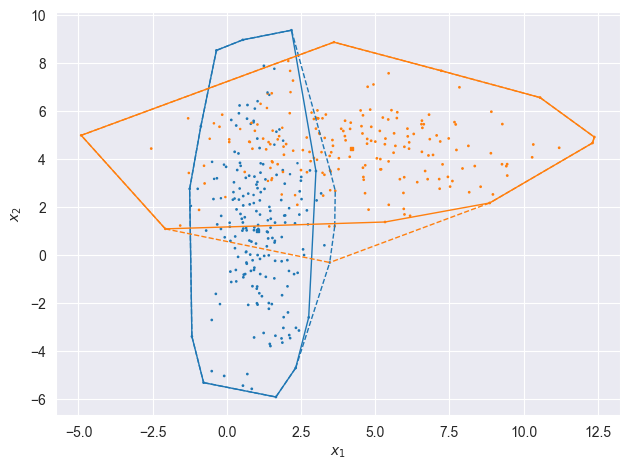

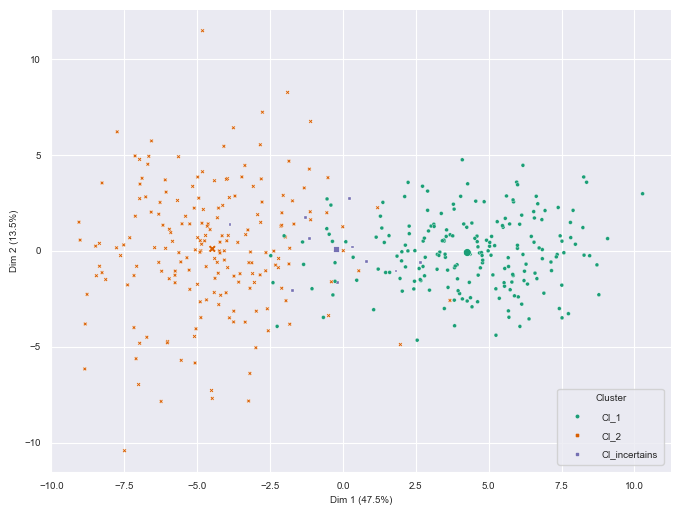

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.9022551233616851
Maximum Non-specificity value: 2.316624051833275
Minimum Non-specificity value: 0.0734764167923205
Average Non-specificity value: 0.8459137611087102
Final weights: [[0.46737111 0.04838359 0.18202229 0.07283622 0.08062092 0.14876586]
 [0.03255526 0.24443572 0.1013064  0.17537606 0.4047691  0.04155747]]


In [30]:
# Feature weighted ECM clustering
c = 2
d = df.shape[1]
W = np.ones((c, d)) * (1/d)
model = fwecm(x=df, c=c, W=W, beta=2, alpha=1, delta=100, ntrials=10, epsi=1e-3)

ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

print(f"Final weights: {model['W']}")

Weight matrix: 
 [[0.46737111 0.04838359 0.18202229 0.07283622 0.08062092 0.14876586]
 [0.03255526 0.24443572 0.1013064  0.17537606 0.4047691  0.04155747]]
Covariance matrix 1: 
 [[1. 0. 0. 0. 0. 0.]
 [0. 9. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 4.]] 
 Covariance matrix 2:
 [[10.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.]
 [ 0.  0.  8.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  9.]]


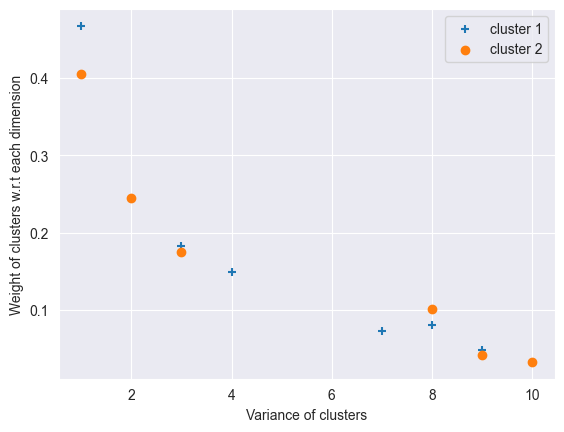

In [35]:
W = model['W']
print(f"Weight matrix: \n {W}")
print(f"Covariance matrix 1: \n {cov_matrix1} \n Covariance matrix 2:\n {cov_matrix2}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': np.diag(cov_matrix1)})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': np.diag(cov_matrix2)})
W_COV_2.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker = '+')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker = 'o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
# plt.figure(figsize=(8, 6))
plt.show()